In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Анализ пиков гистоновой метки

In [37]:
#ENCFF446ASD (имя dataframe = последние три буквы)
asd = pd.read_csv('H2AFZ_bone_marrow_ENCFF446ASD_hg19.bed', sep='\t', comment='t', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'name', 'score']
asd.columns = header[:len(asd.columns)]
asd

,chrom,chromStart,chromEnd,name,score
0,chr8,95487423,95488053,Peak_1,1000
1,chr7,152456213,152456716,Peak_2,865
2,chr8,117887272,117887714,Peak_3,782
3,chr8,55046417,55047356,Peak_4,764
4,chr8,81142341,81143873,Peak_5,758
...,...,...,...,...,...
62934,chr3,4414750,4414965,Peak_62935,10
62935,chr7,82662707,82662922,Peak_62936,10
62936,chrX,101975635,101975915,Peak_62937,10
62937,chr7,52824404,52824762,Peak_62938,10


In [38]:
#ENCFF159YHL
yhl = pd.read_csv('H2AFZ_bone_marrow_ENCFF159YHL_hg19.bed', sep='\t', comment='t', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'name', 'score']
yhl.columns = header[:len(yhl.columns)]
yhl

,chrom,chromStart,chromEnd,name,score
0,chr10,100206801,100207256,Peak_5260,171
1,chr10,100227423,100227907,Peak_17968,90
2,chr10,101418635,101418880,Peak_10832,123
3,chr10,101419354,101419643,Peak_21430,80
4,chr10,101769985,101770392,Peak_22364,78
...,...,...,...,...,...
31145,chrY,2658030,2658566,Peak_21508,80
31146,chrY,2709056,2709508,Peak_6026,163
31147,chrY,2871638,2871849,Peak_27370,68
31148,chrY,6843311,6843671,Peak_25947,70


## Гистограмма длин участков

In [39]:
def get_len(df):
    df['len'] = df.chromEnd - df.chromStart
    return

get_len(asd)
get_len(yhl)
yhl.head()

,chrom,chromStart,chromEnd,name,score,len
0,chr10,100206801,100207256,Peak_5260,171,455
1,chr10,100227423,100227907,Peak_17968,90,484
2,chr10,101418635,101418880,Peak_10832,123,245
3,chr10,101419354,101419643,Peak_21430,80,289
4,chr10,101769985,101770392,Peak_22364,78,407


Так как я изначально брала файлы версии генома hg19, то ничего конвертировать было не нужно.

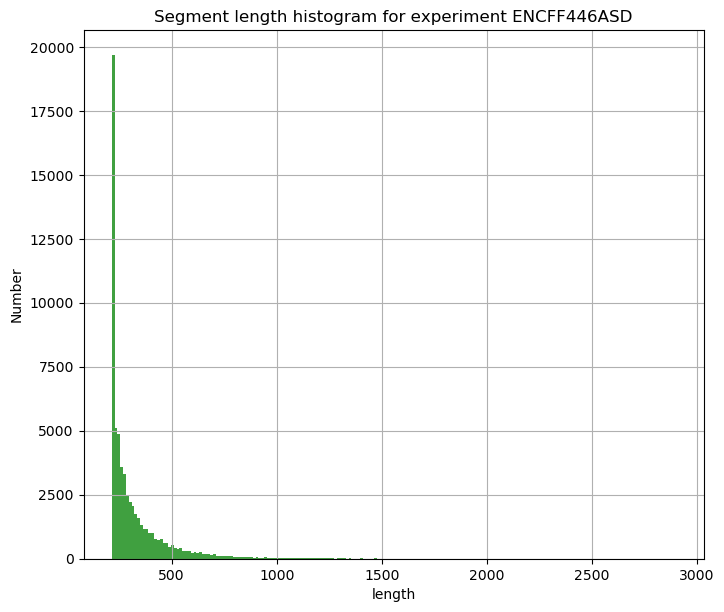

In [40]:
figure(figsize=(8, 7), dpi=100)

n, bins, patches = plt.hist(asd.len, bins=200, density=False, histtype='bar', facecolor='g', alpha=0.75)

plt.xlabel('length')
plt.ylabel('Number')
plt.title('Segment length histogram for experiment ENCFF446ASD')
plt.grid(True)
plt.show()

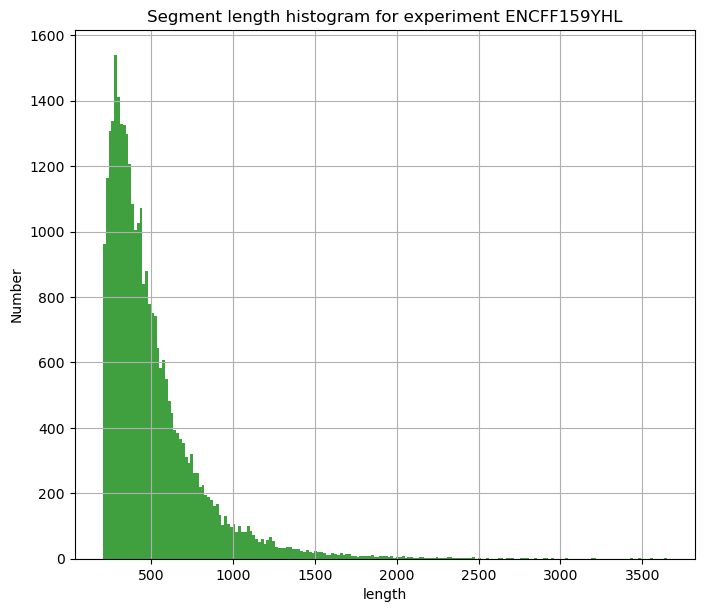

In [41]:
figure(figsize=(8, 7), dpi=100)

n, bins, patches = plt.hist(yhl.len, bins=200, density=False, histtype='bar', facecolor='g', alpha=0.75)

plt.xlabel('length')
plt.ylabel('Number')
plt.title('Segment length histogram for experiment ENCFF159YHL')
plt.grid(True)
plt.show()

## Выкидываем длинные пики

In [42]:
yhl = yhl[yhl.len < 1500]
asd = asd[asd.len < 1500]
print('ENCFF159YHL shape:', yhl.shape)
print('ENCFF446ASD shape:', asd.shape)

ENCFF159YHL shape: (30739, 6)
ENCFF446ASD shape: (62860, 6)


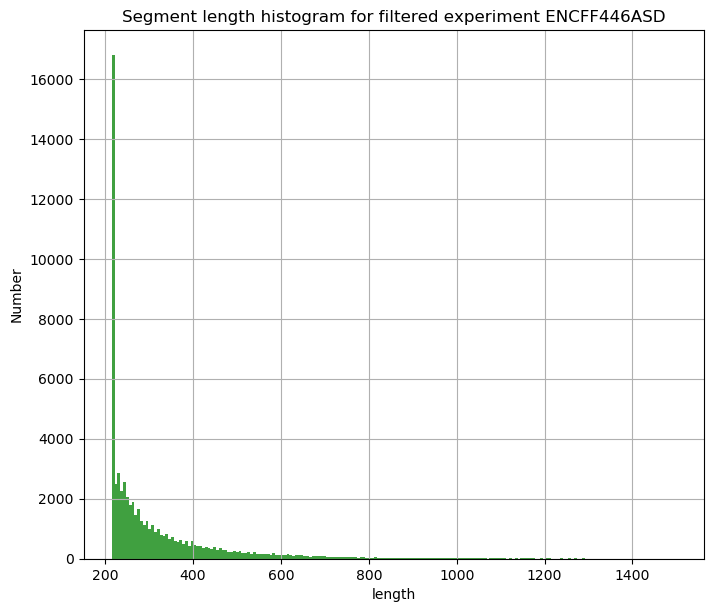

In [43]:
figure(figsize=(8, 7), dpi=100)

n, bins, patches = plt.hist(asd.len, bins=200, density=False, histtype='bar', facecolor='g', alpha=0.75)

plt.xlabel('length')
plt.ylabel('Number')
plt.title('Segment length histogram for filtered experiment ENCFF446ASD')
plt.grid(True)
plt.show()

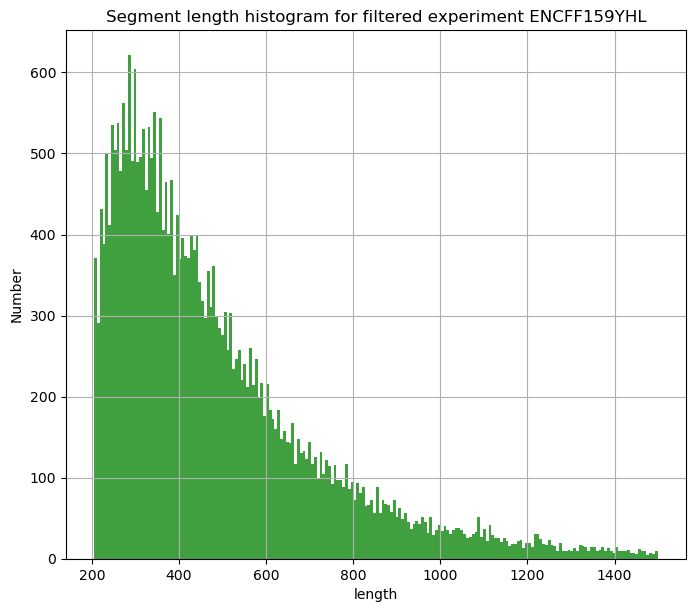

In [44]:
figure(figsize=(8, 7), dpi=100)

n, bins, patches = plt.hist(yhl.len, bins=200, density=False, histtype='bar', facecolor='g', alpha=0.75)

plt.xlabel('length')
plt.ylabel('Number')
plt.title('Segment length histogram for filtered experiment ENCFF159YHL')
plt.grid(True)
plt.show()

In [45]:
yhl = yhl.drop(columns='len')
asd = asd.drop(columns='len')
asd

,chrom,chromStart,chromEnd,name,score
0,chr8,95487423,95488053,Peak_1,1000
1,chr7,152456213,152456716,Peak_2,865
2,chr8,117887272,117887714,Peak_3,782
3,chr8,55046417,55047356,Peak_4,764
5,chr7,127984047,127984709,Peak_6,707
...,...,...,...,...,...
62934,chr3,4414750,4414965,Peak_62935,10
62935,chr7,82662707,82662922,Peak_62936,10
62936,chrX,101975635,101975915,Peak_62937,10
62937,chr7,52824404,52824762,Peak_62938,10


In [46]:
yhl.to_csv(r'H2AFZ_bone_marrow_ENCFF159YHL_hg19_filtered.bed', header=None, index=None, sep='\t', mode='a')
asd.to_csv(r'H2AFZ_bone_marrow_ENCFF446ASD_hg19_filtered.bed', header=None, index=None, sep='\t', mode='a')

## Расположение пиков относительно аннотированных генов.

In [47]:
utr3 = pd.read_csv('ENCFF159YHL_3utr_int.bed', sep='\t', comment='t', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'num']
utr3.columns = header[:len(utr3.columns)]

utr5 = pd.read_csv('ENCFF159YHL_5utr_int.bed', sep='\t', comment='t', header=None)
utr5.columns = header[:len(utr5.columns)]

codingExons = pd.read_csv('ENCFF159YHL_codingExons_int.bed', sep='\t', comment='t', header=None)
codingExons.columns = header[:len(codingExons.columns)]

exons = pd.read_csv('ENCFF159YHL_exons_int.bed', sep='\t', comment='t', header=None)
exons.columns = header[:len(exons.columns)]

introns = pd.read_csv('ENCFF159YHL_introns_int.bed', sep='\t', comment='t', header=None)
introns.columns = header[:len(introns.columns)]

promoters = pd.read_csv('ENCFF159YHL_promoters_int.bed', sep='\t', comment='t', header=None)
promoters.columns = header[:len(promoters.columns)]

In [48]:
utr3 = utr3.drop_duplicates(subset=['chromStart', 'chromEnd'])
utr5 = utr5.drop_duplicates(subset=['chromStart', 'chromEnd'])
codingExons = codingExons.drop_duplicates(subset=['chromStart', 'chromEnd'])
exons = exons.drop_duplicates(subset=['chromStart', 'chromEnd'])
introns = introns.drop_duplicates(subset=['chromStart', 'chromEnd'])
promoters = promoters.drop_duplicates(subset=['chromStart', 'chromEnd'])

In [49]:
d = {}
d = {'utr3': utr3['num'].sum(), 'utr5': utr5['num'].sum(), 'codingExons': codingExons['num'].sum(),
            'exons': exons['num'].sum(), 'introns': introns['num'].sum(), 'promoters': promoters['num'].sum()}

s = 0
for value in d.values():
    s += value

d['sum'] = s
print(d)

{'utr3': 1993, 'utr5': 7084, 'codingExons': 4117, 'exons': 11452, 'introns': 39101, 'promoters': 22283, 'sum': 86030}


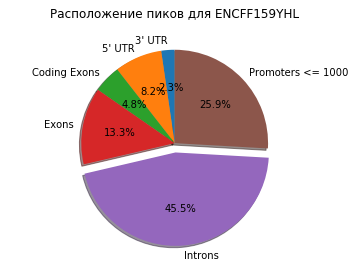

In [50]:
labels = "3' UTR", "5' UTR", 'Coding Exons', 'Exons', 'Introns', 'Promoters <= 1000'
sizes = [d['utr3']/d['sum'], d['utr5']/d['sum'], d['codingExons']/d['sum'], d['exons']/d['sum'], d['introns']/d['sum'], d['promoters']/d['sum']]
explode = (0, 0, 0, 0, 0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Расположение пиков для ENCFF159YHL', y=1.08)
plt.show()

In [51]:
utr3 = pd.read_csv('ENCFF446ASD_3utr.bed', sep='\t', comment='t', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'num']
utr3.columns = header[:len(utr3.columns)]

utr5 = pd.read_csv('ENCFF446ASD_5utr.bed', sep='\t', comment='t', header=None)
utr5.columns = header[:len(utr5.columns)]

codingExons = pd.read_csv('ENCFF446ASD_codingExons.bed', sep='\t', comment='t', header=None)
codingExons.columns = header[:len(codingExons.columns)]

exons = pd.read_csv('ENCFF446ASD_exons.bed', sep='\t', comment='t', header=None)
exons.columns = header[:len(exons.columns)]

introns = pd.read_csv('ENCFF446ASD_introns.bed', sep='\t', comment='t', header=None)
introns.columns = header[:len(introns.columns)]

promoters = pd.read_csv('ENCFF446ASD_promoters.bed', sep='\t', comment='t', header=None)
promoters.columns = header[:len(promoters.columns)]


utr3 = utr3.drop_duplicates(subset=['chromStart', 'chromEnd'])
utr5 = utr5.drop_duplicates(subset=['chromStart', 'chromEnd'])
codingExons = codingExons.drop_duplicates(subset=['chromStart', 'chromEnd'])
exons = exons.drop_duplicates(subset=['chromStart', 'chromEnd'])
introns = introns.drop_duplicates(subset=['chromStart', 'chromEnd'])
promoters = promoters.drop_duplicates(subset=['chromStart', 'chromEnd'])


d = {}
d = {'utr3': utr3['num'].sum(), 'utr5': utr5['num'].sum(), 'codingExons': codingExons['num'].sum(),
            'exons': exons['num'].sum(), 'introns': introns['num'].sum(), 'promoters': promoters['num'].sum()}

s = 0
for value in d.values():
    s += value

d['sum'] = s
print(d)

{'utr3': 3485, 'utr5': 8710, 'codingExons': 6076, 'exons': 16136, 'introns': 87389, 'promoters': 25996, 'sum': 147792}


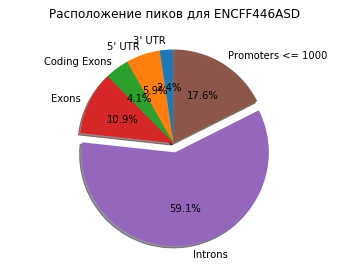

In [52]:
labels = "3' UTR", "5' UTR", 'Coding Exons', 'Exons', 'Introns', 'Promoters <= 1000'
sizes = [d['utr3']/d['sum'], d['utr5']/d['sum'], d['codingExons']/d['sum'], d['exons']/d['sum'], d['introns']/d['sum'], d['promoters']/d['sum']]
explode = (0, 0, 0, 0, 0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Расположение пиков для ENCFF446ASD', y=1.08)
plt.show()

# Анализ участков Z-DNA

In [53]:
zdna = pd.read_csv('DeepZ.bed', sep='\t', comment='t', header=None)
header = ['chrom', 'chromStart', 'chromEnd']
zdna.columns = header[:len(zdna.columns)]
zdna

,chrom,chromStart,chromEnd
0,chr1,9885,10697
1,chr1,10936,11065
2,chr1,11102,11440
3,chr1,29004,29611
4,chr1,564495,565370
...,...,...,...
19389,chrM,0,1556
19390,chrM,3388,3731
19391,chrM,12845,13206
19392,chrM,14607,14643


In [54]:
get_len(zdna)
zdna.head()

,chrom,chromStart,chromEnd,len
0,chr1,9885,10697,812
1,chr1,10936,11065,129
2,chr1,11102,11440,338
3,chr1,29004,29611,607
4,chr1,564495,565370,875


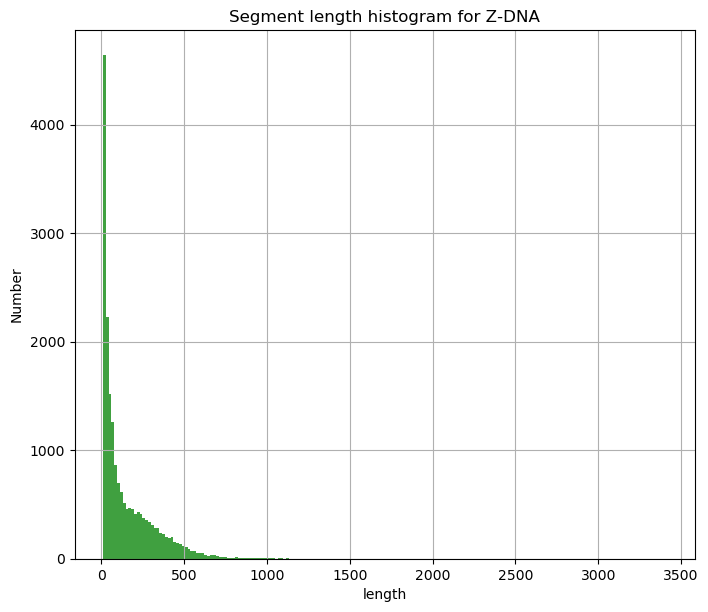

In [55]:
figure(figsize=(8, 7), dpi=100)

n, bins, patches = plt.hist(zdna.len, bins=200, density=False, histtype='bar', facecolor='g', alpha=0.75)

plt.xlabel('length')
plt.ylabel('Number')
plt.title('Segment length histogram for Z-DNA')
plt.grid(True)
plt.show()

In [56]:
utr3 = pd.read_csv('DeepZ_3utr.bed', sep='\t', comment='t', header=None)
header = ['chrom', 'chromStart', 'chromEnd', 'num']
utr3.columns = header[:len(utr3.columns)]

utr5 = pd.read_csv('DeepZ_5utr.bed', sep='\t', comment='t', header=None)
utr5.columns = header[:len(utr5.columns)]

codingExons = pd.read_csv('DeepZ_codingExons.bed', sep='\t', comment='t', header=None)
codingExons.columns = header[:len(codingExons.columns)]

exons = pd.read_csv('DeepZ_exons.bed', sep='\t', comment='t', header=None)
exons.columns = header[:len(exons.columns)]

introns = pd.read_csv('DeepZ_introns.bed', sep='\t', comment='t', header=None)
introns.columns = header[:len(introns.columns)]

promoters = pd.read_csv('DeepZ_promoters.bed', sep='\t', comment='t', header=None)
promoters.columns = header[:len(promoters.columns)]


utr3 = utr3.drop_duplicates(subset=['chromStart', 'chromEnd'])
utr5 = utr5.drop_duplicates(subset=['chromStart', 'chromEnd'])
codingExons = codingExons.drop_duplicates(subset=['chromStart', 'chromEnd'])
exons = exons.drop_duplicates(subset=['chromStart', 'chromEnd'])
introns = introns.drop_duplicates(subset=['chromStart', 'chromEnd'])
promoters = promoters.drop_duplicates(subset=['chromStart', 'chromEnd'])


d = {}
d = {'utr3': utr3['num'].sum(), 'utr5': utr5['num'].sum(), 'codingExons': codingExons['num'].sum(),
            'exons': exons['num'].sum(), 'introns': introns['num'].sum(), 'promoters': promoters['num'].sum()}

s = 0
for value in d.values():
    s += value

d['sum'] = s
print(d)

{'utr3': 2798, 'utr5': 21905, 'codingExons': 7033, 'exons': 27457, 'introns': 31527, 'promoters': 34226, 'sum': 124946}


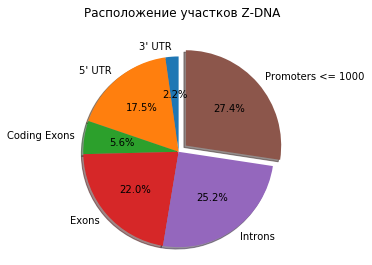

In [57]:
labels = "3' UTR", "5' UTR", 'Coding Exons', 'Exons', 'Introns', 'Promoters <= 1000'
sizes = [d['utr3']/d['sum'], d['utr5']/d['sum'], d['codingExons']/d['sum'], d['exons']/d['sum'], d['introns']/d['sum'], d['promoters']/d['sum']]
explode = (0, 0, 0, 0, 0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Расположение участков Z-DNA', y=1.08)
plt.show()

# Анализ пересечений гистоновой метки и Z-DNA

In [58]:
intersection = pd.read_csv('H2AFZ_bone_marrow_intersect_with_DeepZ.bed', sep='\t', comment='t', header=None)
header = ['chrom', 'chromStart', 'chromEnd']
intersection.columns = header[:len(intersection.columns)]
intersection

,chrom,chromStart,chromEnd
0,chr1,1510394,1510398
1,chr1,3713236,3713250
2,chr1,6259857,6259930
3,chr1,6259955,6259973
4,chr1,6259985,6259999
...,...,...,...
2651,chrX,128978191,128978317
2652,chrX,129305839,129306042
2653,chrX,131352328,131352364
2654,chrX,133683328,133683427


In [59]:
get_len(intersection)
intersection.head()

,chrom,chromStart,chromEnd,len
0,chr1,1510394,1510398,4
1,chr1,3713236,3713250,14
2,chr1,6259857,6259930,73
3,chr1,6259955,6259973,18
4,chr1,6259985,6259999,14


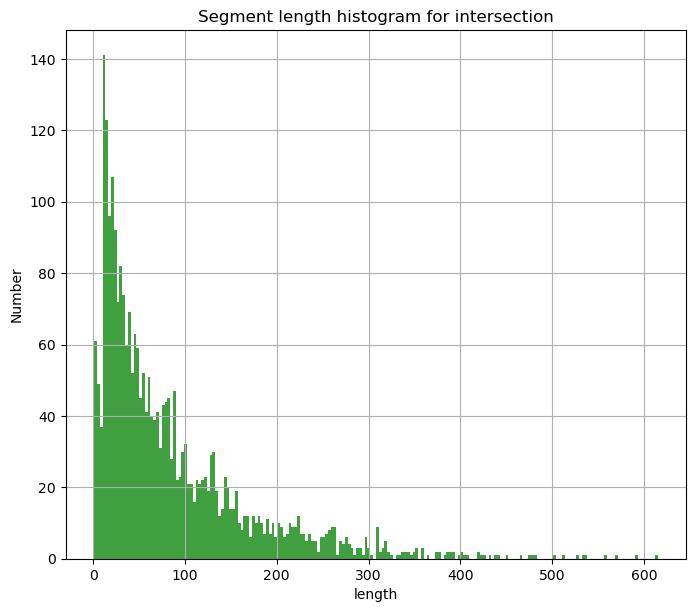

In [60]:
figure(figsize=(8, 7), dpi=100)

n, bins, patches = plt.hist(intersection.len, bins=200, density=False, histtype='bar', facecolor='g', alpha=0.75)

plt.xlabel('length')
plt.ylabel('Number')
plt.title('Segment length histogram for intersection')
plt.grid(True)
plt.show()